In [1]:
# In this notebook, you learn:
#
# 1) How to draw a directed graph that represents a mathematical expression.
#
#
#
# Prerequisites to use graphviz:
# 1) Install graphviz
#       - sudo apt-get install graphviz
#           - This is the graphviz library that is used to draw graphs in dot language.
#           - Link: https://www.graphviz.org/download/
# 2) Install the graphviz python package
#       - pip install graphviz
#           - This is the Python interface to the graphviz library.
#           - Link: https://pypi.org/project/graphviz/
# 3) Documentation for basic graphviz usage in Python
#       - https://graphviz.readthedocs.io/en/stable/manual.html

In [30]:
from graphviz import Digraph
from IPython.display import Image

In [24]:
# Digraph creates the content of the graph in the dot language - dot is a special language (https://www.graphviz.org/doc/info/lang.html)
# used to define graphs.
dot = Digraph(name="ExpressionGraph", comment="Mathematical Expression")
print(f"type(dot) = {type(dot)}")
print("-" * 150)
# It will be empty since we have not added any nodes or edges to the graph.
print(f"dot = {dot}")

type(dot) = <class 'graphviz.graphs.Digraph'>
------------------------------------------------------------------------------------------------------------------------------------------------------
dot = // Mathematical Expression
digraph ExpressionGraph {
}



In [25]:
# Add nodes to the graph. Lets just add 3 nodes for now.
# name  -- unique identifier for the node.
# label -- text that is displayed for the node when the graph is drawn.
dot.node(name="a", label="a")
dot.node(name="b", label="b")
dot.node(name="c", label="c")
# Now the graph should have 3 nodes.
print(f"dot = {dot}")

dot = // Mathematical Expression
digraph ExpressionGraph {
	a [label=a]
	b [label=b]
	c [label=c]
}



In [26]:
# Let's add some edges to the graph.
#
# There are two way to add edges to the graph.
#   1) Add multiple edges at once using the edges() method.
#   2) Add edges one by one using the edge() method.

# This will add edges from a to b and from c to b.
dot.edges(tail_head_iter=["ab", "cb"])
print(f"dot = {dot}")
print("-" * 150)
# This will add an edge from a to c.
dot.edge(tail_name="a", head_name="c")
print(f"dot = {dot}")

dot = // Mathematical Expression
digraph ExpressionGraph {
	a [label=a]
	b [label=b]
	c [label=c]
	a -> b
	c -> b
}

------------------------------------------------------------------------------------------------------------------------------------------------------
dot = // Mathematical Expression
digraph ExpressionGraph {
	a [label=a]
	b [label=b]
	c [label=c]
	a -> b
	c -> b
	a -> c
}



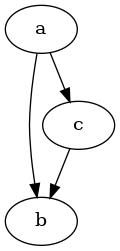

In [32]:
# Let's save the image and display it. We cannot directly display the image using view=True since we are running this
# in wsl and apparently dot.render depends on underlying os capabilities to display the image which becomes a little
# tricky in wsl. So, we will save the image and then display it using the Source class.
dot.render(format="png", directory="../Data/Images", view=False)
Image(filename="../Data/Images/ExpressionGraph.gv.png")

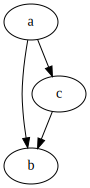

In [36]:
# We can also display the graph in Jupyter notebook by simply running the dot object.
dot

Now, let's try to use additional features provided by graphviz to display in a user friendly manner that makes it <br>
easier to visualize a mathematical expression.

In [50]:
# Let's create a function to add nodes and edges to the dot object.
def populate_simple_expression_graph(dot: Digraph) -> Digraph:
    # Add nodes to the graph.
    dot.node(name="a", label="a", shape="rectangle")
    dot.node(name="b", label="b", shape="rectangle")
    dot.node(name="c", label="c", shape="rectangle")
    dot.node(name="d", label="d", shape="rectangle")
    # Add edges to the graph.
    dot.edges(tail_head_iter=["ab", "cb"])
    dot.edge(tail_name="b", head_name="d")
    dot.edge(tail_name="a", head_name="d")
    dot.edge(tail_name="c", head_name="d")
    return dot

In [51]:
dot_2 = Digraph(name="ExpressionGraph_2", 
                comment="Mathematical Expression", 
                format="png", 
                directory="../Data/Images",
                graph_attr={"rankdir": "LR"})  # This is to instruct the graph to draw the edges from left to right.
print(f"dot_2 = {dot_2}")

dot_2 = // Mathematical Expression
digraph ExpressionGraph_2 {
	graph [rankdir=LR]
}



In [52]:
dot_2 = populate_simple_expression_graph(dot=dot_2)
print(f"dot_2 = {dot_2}")

dot_2 = // Mathematical Expression
digraph ExpressionGraph_2 {
	graph [rankdir=LR]
	a [label=a shape=rectangle]
	b [label=b shape=rectangle]
	c [label=c shape=rectangle]
	d [label=d shape=rectangle]
	a -> b
	c -> b
	b -> d
	a -> d
	c -> d
}



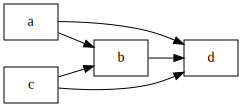

In [53]:
dot_2